In [1]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

import pickle

import copy

import tensorflow.keras.backend as backend


import os

# os.environ["CUDA_DEVICE_ORDER"] = "GPU"  # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = "2"

from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11885715512841450433
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 15114618534879461534
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 15911399931366476152
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 7574438560
locality {
  bus_id: 2
  numa_node: 1
  links {
  }
}
incarnation: 10573395541235300936
physical_device_desc: "device: 0, name: GeForce GTX 1080, pci bus id: 0000:83:00.0, compute capability: 6.1"
]


In [2]:
# import tensorflow as tf
# gpus= tf.config.experimental.list_physical_devices('GPU')
# tf.config.experimental.set_memory_growth(gpus[0], True)

In [3]:
# zip_path = tf.keras.utils.get_file(
#     origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
#     fname='jena_climate_2009_2016.csv.zip',
#     extract=True)
# csv_path, _ = os.path.splitext(zip_path)

In [4]:
# df = pd.read_csv(csv_path)
# df

In [5]:
# # df = pd.read_csv(csv_path)
# # slice [start:stop:step], starting from index 5 take every 6th record.
# df = df[5::6]

# date_time = pd.to_datetime(df.pop('Date Time'), format='%d.%m.%Y %H:%M:%S')

# df

In [6]:
df = pickle.load( open( "/home/richard_stana/programing/clanok/data/picklnute/10min.p", "rb" ) )
df

,10m-item56,10m-item57,10m-item58,10m-item59,10m-item60,10m-item61,10m-item62,10m-item63,10m-item64,10m-item65,...,10m-item68,10m-item69,10m-item70,10m-item71,10m-item72,10m-item73,10m-item74,10m-item75,10m-item76,10m-item77
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,5,5,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
2,5,5,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,5,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,4,4,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52412,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
52413,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
52414,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
52415,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [7]:
casy = pd.read_csv("casy.csv")
df["Date Time"]=casy
df

,10m-item56,10m-item57,10m-item58,10m-item59,10m-item60,10m-item61,10m-item62,10m-item63,10m-item64,10m-item65,...,10m-item69,10m-item70,10m-item71,10m-item72,10m-item73,10m-item74,10m-item75,10m-item76,10m-item77,Date Time
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11.12.2017 00:10:00
1,4,5,5,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,11.12.2017 00:20:00
2,5,5,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11.12.2017 00:30:00
3,5,5,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11.12.2017 00:40:00
4,3,4,4,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,11.12.2017 00:50:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52412,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,09.12.2018 23:30:00
52413,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,09.12.2018 23:40:00
52414,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,09.12.2018 23:50:00
52415,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,10.12.2018 00:00:00


In [8]:
date_time = pd.to_datetime(df.pop('Date Time'), format='%d.%m.%Y %H:%M:%S')


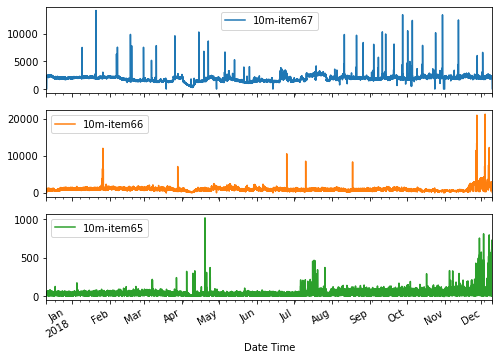

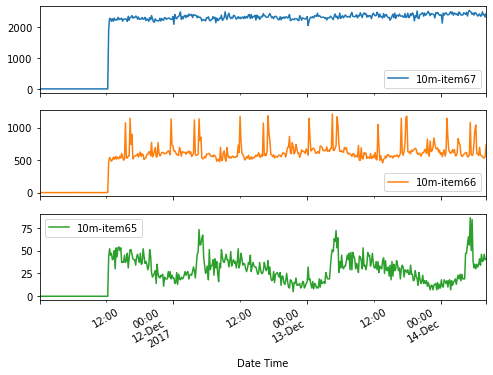

In [9]:
plot_cols = ['10m-item67', '10m-item66', '10m-item65']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)

In [10]:
df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
10m-item56,52417.0,11506.054105,3506.217382,-1.0,8967.0,11617.0,13761.0,97641.0
10m-item57,52417.0,10164.934010,2789.460760,-1.0,8083.0,10312.0,12080.0,94554.0
10m-item58,52417.0,11581.105481,3661.372832,-1.0,9097.0,11705.0,13760.0,182582.0
10m-item59,52417.0,9764.882767,2912.826019,-1.0,7406.0,9903.0,11917.0,33550.0
10m-item60,52417.0,3.425110,8.354461,-1.0,0.0,0.0,3.0,105.0
10m-item61,52417.0,891.115669,514.252558,-1.0,632.0,808.0,991.0,4571.0
10m-item62,52417.0,528.366828,913.180084,-1.0,27.0,158.0,808.0,72431.0
10m-item63,52417.0,129.995440,1117.366879,-1.0,0.0,62.0,172.0,134640.0
10m-item64,52417.0,70.801419,805.247044,-1.0,0.0,26.0,84.0,171116.0
10m-item65,52417.0,31.659042,38.313105,-1.0,16.0,25.0,36.0,1018.0


In [11]:
# wv = df['wv (m/s)']
# bad_wv = wv == -1
# wv[bad_wv] = 0.0

# max_wv = df['max. wv (m/s)']
# bad_max_wv = max_wv == -9999.0
# max_wv[bad_max_wv] = 0.0

# # The above inplace edits are reflected in the DataFrame
# df['wv (m/s)'].min()

In [12]:
# plt.hist2d(df['wd (deg)'], df['wv (m/s)'], bins=(50, 50), vmax=400)
# plt.colorbar()
# plt.xlabel('Wind Direction [deg]')
# plt.ylabel('Wind Velocity [m/s]')

In [13]:
# wv = df.pop('wv (m/s)')
# max_wv = df.pop('max. wv (m/s)')

# # Convert to radians.
# wd_rad = df.pop('wd (deg)')*np.pi / 180

# # Calculate the wind x and y components.
# df['Wx'] = wv*np.cos(wd_rad)
# df['Wy'] = wv*np.sin(wd_rad)

# # Calculate the max wind x and y components.
# df['max Wx'] = max_wv*np.cos(wd_rad)
# df['max Wy'] = max_wv*np.sin(wd_rad)

# plt.hist2d(df['Wx'], df['Wy'], bins=(50, 50), vmax=400)
# plt.colorbar()
# plt.xlabel('Wind X [m/s]')
# plt.ylabel('Wind Y [m/s]')
# ax = plt.gca()
# ax.axis('tight')

In [14]:
# timestamp_s = date_time.map(datetime.datetime.timestamp)

# day = 24*60*60
# year = (365.2425)*day

# df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
# df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
# df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
# df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

# plt.plot(np.array(df['Day sin'])[:25])
# plt.plot(np.array(df['Day cos'])[:25])
# plt.xlabel('Time [h]')
# plt.title('Time of day signal')

/home/richard_stana/.conda/envs/pipTF2.3-gpu/lib/python3.7/site-packages/matplotlib/transforms.py:2802: ComplexWarning: Casting complex values to real discards the imaginary part
  vmin, vmax = map(float, [vmin, vmax])


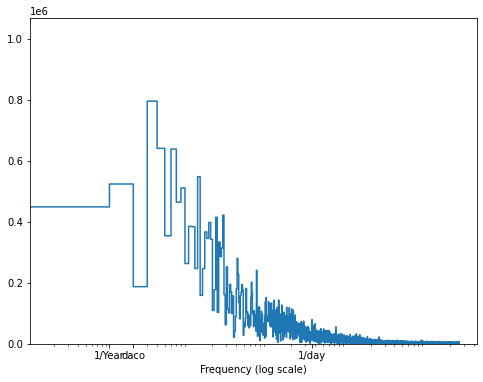

In [15]:
fft = tf.signal.rfft(df["10m-item76"])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(df["10m-item76"])/6
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, np.max(fft)/10)
# print(np.max(fft))
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 2, 365.2524], labels=['1/Year', 'daco', '1/day'])
_ = plt.xlabel('Frequency (log scale)')


In [16]:
# for i in range(len(df["10m-item76"])):
#     if df["10m-item76"][i] == -1 or df["10m-item76"][i] == 0:
#         print(i)

In [17]:
df = df.drop(["10m-item56", "10m-item57", "10m-item58", "10m-item60", "10m-item63", "10m-item64", "10m-item74"], axis=1)

In [18]:
BATCH_SIZE=128

In [19]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[76:44000]
val_df = df[44001:46655]
test_df = df[46800:52389]



num_features = df.shape[1]

train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

In [20]:
df

,10m-item59,10m-item61,10m-item62,10m-item65,10m-item66,10m-item67,10m-item68,10m-item69,10m-item70,10m-item71,10m-item72,10m-item73,10m-item75,10m-item76,10m-item77
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52412,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
52413,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
52414,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
52415,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


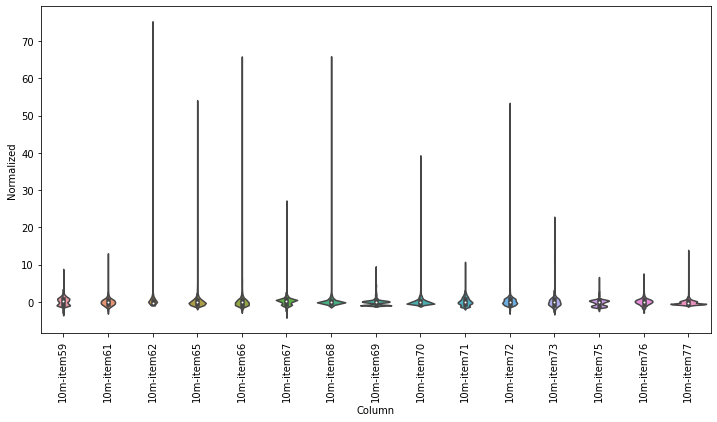

In [21]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

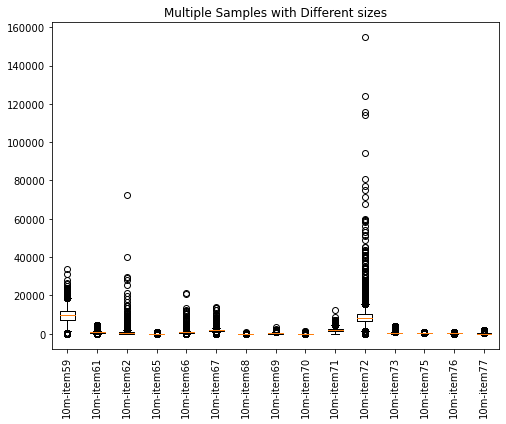

In [22]:
fig7, ax7 = plt.subplots()
ax7.set_title('Multiple Samples with Different sizes')
ax7.boxplot(df, whis=1.5)
_ = ax7.set_xticklabels(df.keys(), rotation=90)
plt.show()

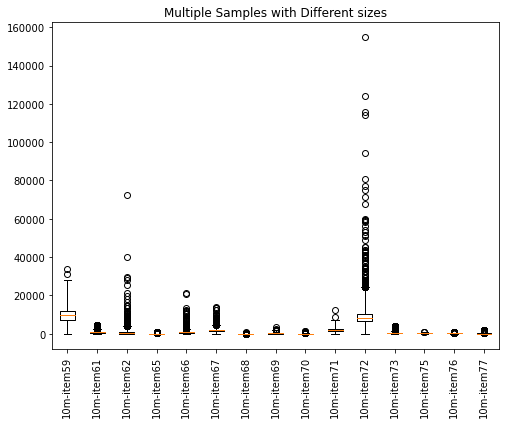

In [23]:
fig7, ax7 = plt.subplots()
ax7.set_title('Multiple Samples with Different sizes')
ax7.boxplot(df, whis=4)
_ = ax7.set_xticklabels(df.keys(), rotation=90)
plt.show()

In [24]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

10m-item59    4511.0
10m-item61     359.0
10m-item62     781.0
10m-item65      20.0
10m-item66     377.0
10m-item67     555.0
10m-item68      10.0
10m-item69     355.0
10m-item70      33.0
10m-item71    1431.0
10m-item72    3532.0
10m-item73     239.0
10m-item75     178.0
10m-item76      76.0
10m-item77     104.0
dtype: float64


In [25]:
outlayers = ((df < (Q1 - 3 * IQR)) |((df > (Q3 + 3 * IQR))))

In [26]:
for i in outlayers.columns:
    print(outlayers[i].value_counts())

False    52412
True         5
Name: 10m-item59, dtype: int64
False    50301
True      2116
Name: 10m-item61, dtype: int64
False    51705
True       712
Name: 10m-item62, dtype: int64
False    51108
True      1309
Name: 10m-item65, dtype: int64
False    50650
True      1767
Name: 10m-item66, dtype: int64
False    52359
True        58
Name: 10m-item67, dtype: int64
False    51476
True       941
Name: 10m-item68, dtype: int64
False    51591
True       826
Name: 10m-item69, dtype: int64
False    51590
True       827
Name: 10m-item70, dtype: int64
False    52410
True         7
Name: 10m-item71, dtype: int64
False    52062
True       355
Name: 10m-item72, dtype: int64
False    50119
True      2298
Name: 10m-item73, dtype: int64
False    52281
True       136
Name: 10m-item75, dtype: int64
False    52185
True       232
Name: 10m-item76, dtype: int64
False    51649
True       768
Name: 10m-item77, dtype: int64


In [27]:
all_outlayers = []
item76out = []
for i in outlayers.columns:
    if i == '10m-item76':
        item76out = outlayers.index[outlayers[i] == True].tolist()
    all_outlayers += outlayers.index[outlayers[i] == True].tolist()
all_outlayers = list(set(all_outlayers))
print(len(all_outlayers))


7041


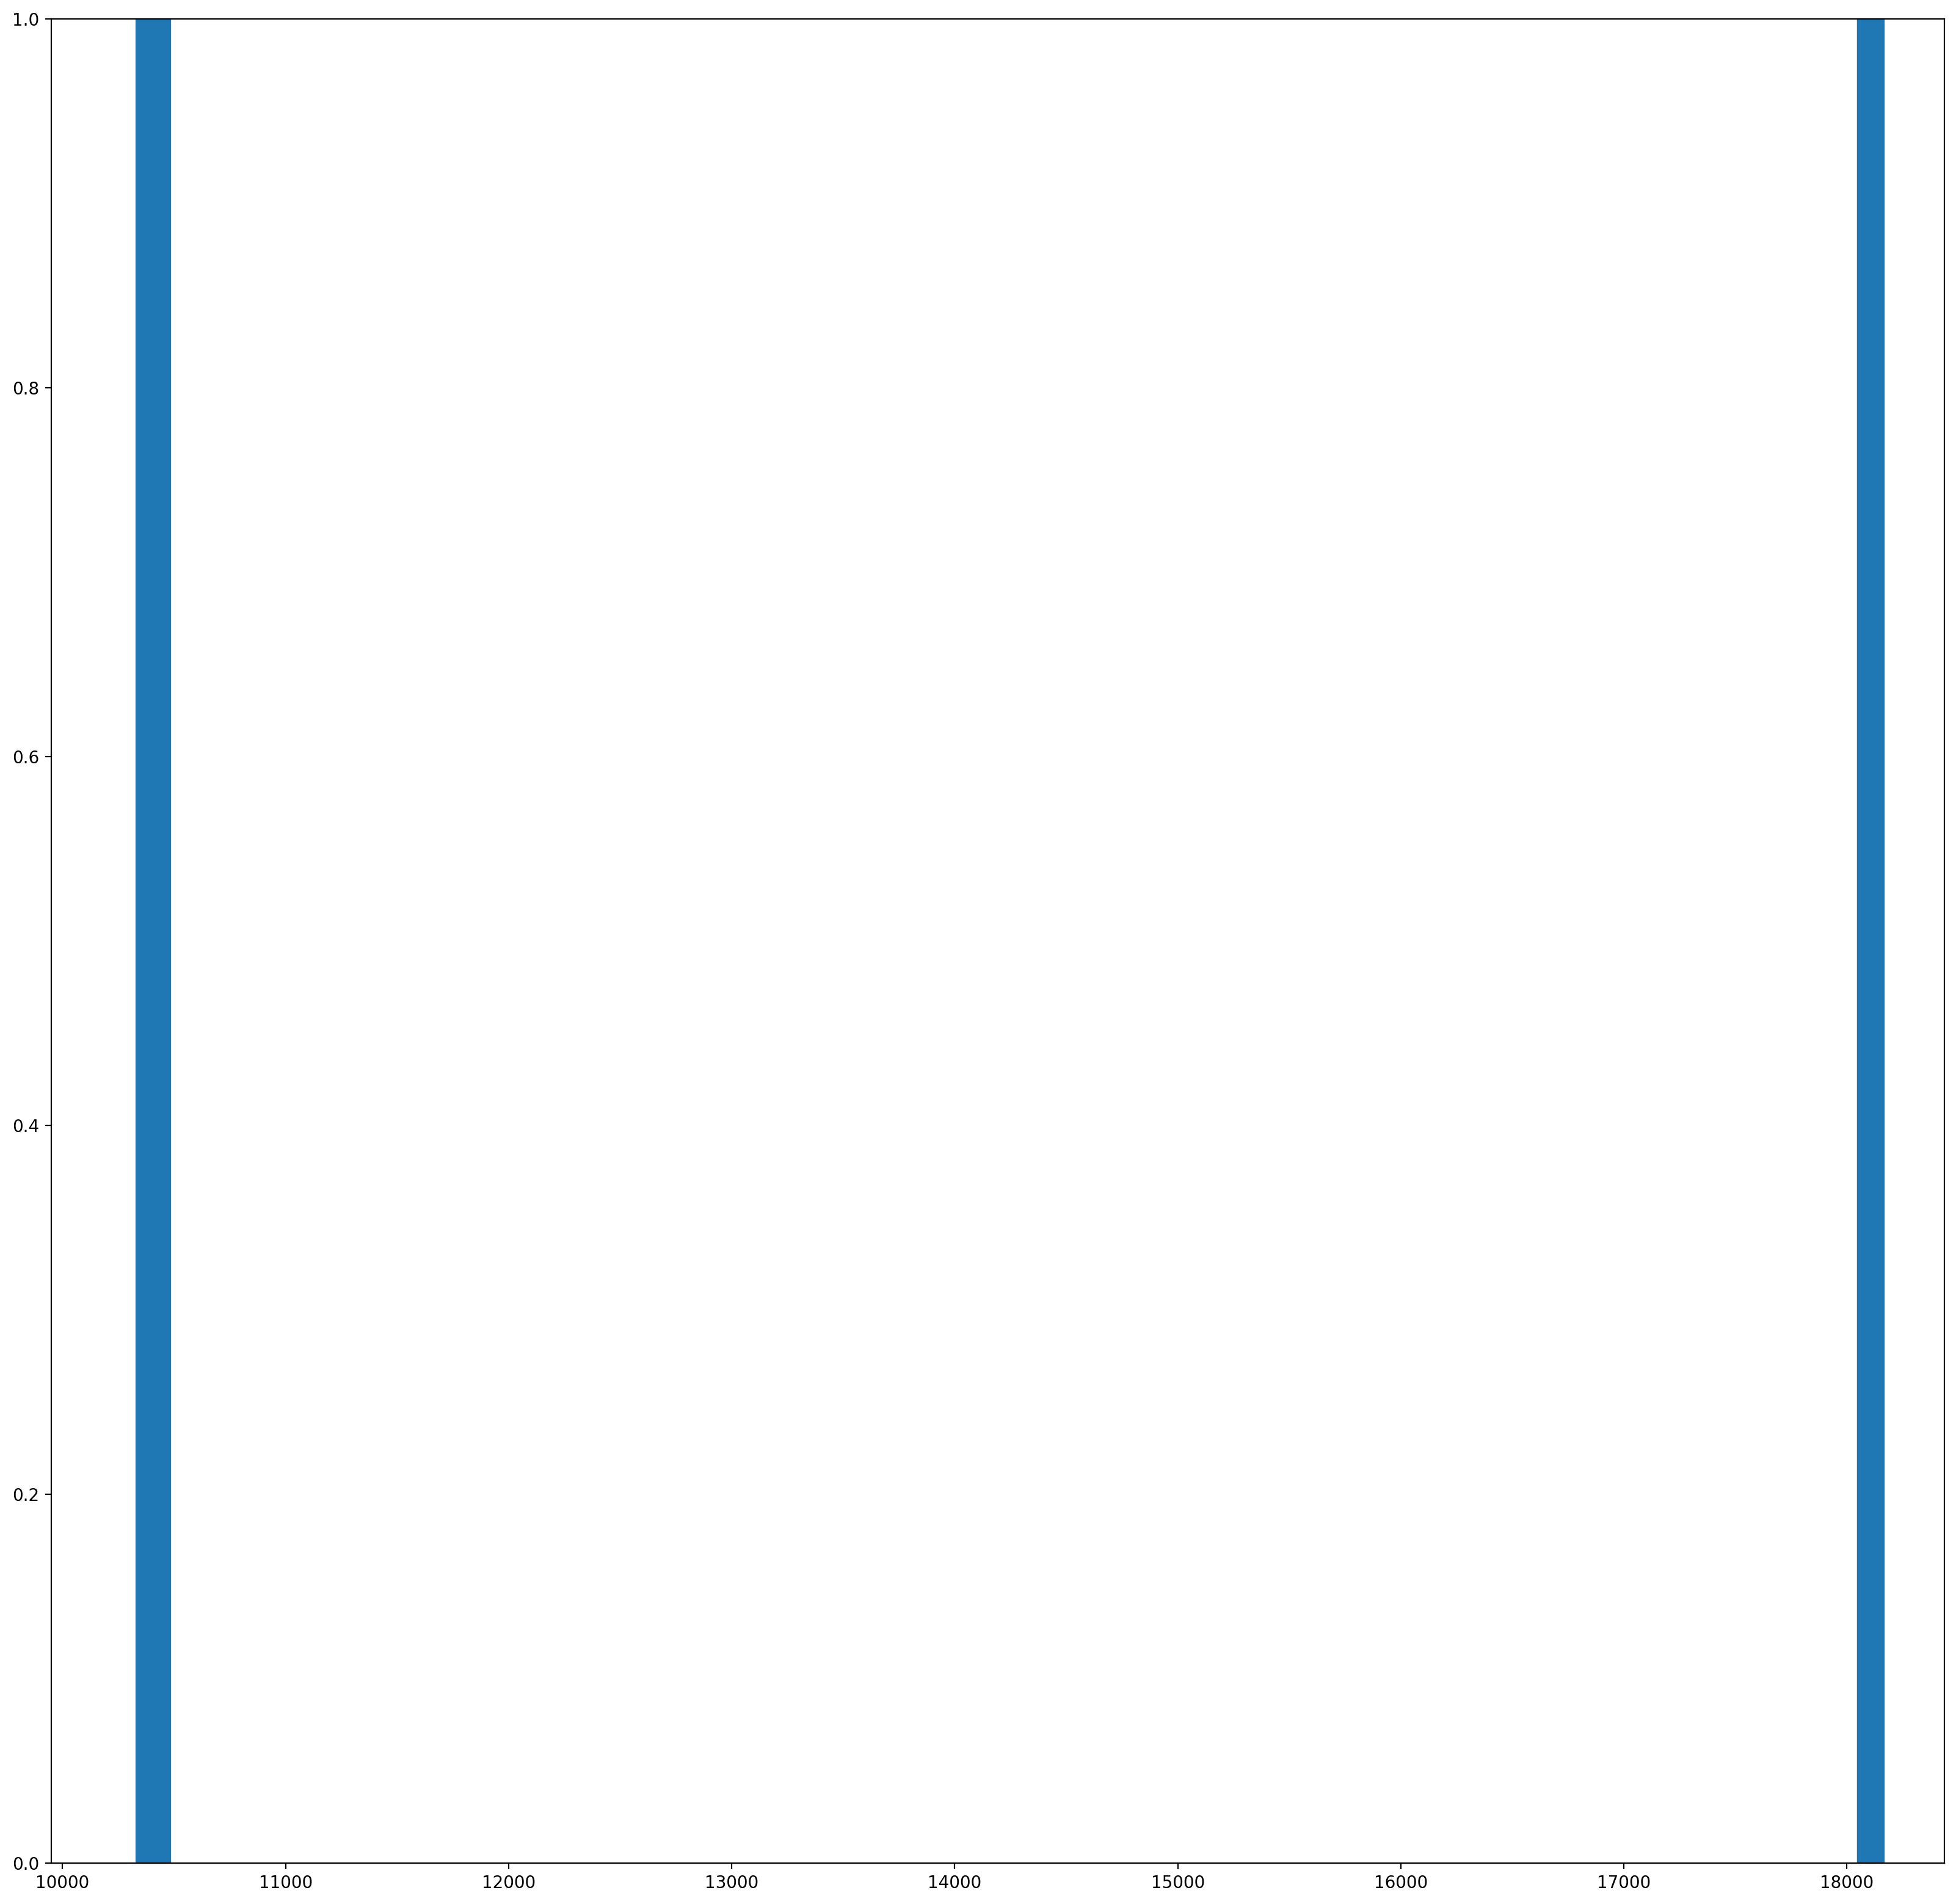

In [28]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 20), dpi=200, facecolor='w', edgecolor='k')
for i in item76out:
    plt.axvline(i)

In [29]:
def mae(y_true, y_pred):

    mae = backend.abs(y_true[:,-1] - y_pred[:,-1])
  
    return mae


In [30]:
def special_mae(y_true, y_pred):
    # print(y_true)
    # print(y_pred)
    dn_1_mae = tf.reshape(backend.abs(y_true[:,-1] - y_pred[:,-1]), [-1, 1])
#     print(dn_1_mae)
    dn = tf.reshape(backend.abs(y_true[:,0] - y_pred[:,-1]), [-1, 1])
    diff = (dn_1_mae - dn)*2
#     print(diff)

    concat_with_zeros = backend.concatenate((tf.constant(np.zeros([BATCH_SIZE, 1]), dtype=tf.float32), diff), axis=-1)
#     print(concat_with_zeros)
    max1 = tf.reshape(backend.max(concat_with_zeros, axis=-1), [-1, 1])
#     print(max1)
    concat_with_mae = backend.concatenate((dn_1_mae, max1), axis=-1)
#     print(concat_with_mae)
    max2 = tf.reshape(backend.max(concat_with_mae, axis=-1), [-1, 1])
    return max2


In [31]:
def special_mae_plus(y_true, y_pred):
    # print(y_true)
    # print(y_pred)
    dn_1_mae = tf.reshape(backend.abs(y_true[:,-1] - y_pred[:,-1]), [-1, 1])
#     print(dn_1_mae)
    dn = tf.reshape(backend.abs(y_true[:,0] - y_pred[:,-1]), [-1, 1])
    diff = (dn_1_mae - dn)*2
#     print(diff)

    concat_with_zeros = backend.concatenate((tf.constant(np.zeros([BATCH_SIZE, 1]), dtype=tf.float32), diff), axis=-1)
#     print(concat_with_zeros)
    max1 = tf.reshape(backend.max(concat_with_zeros, axis=-1), [-1, 1])
#     print(max1)
    max1_plus_mae = dn_1_mae + max1
#     print(concat_with_mae)
#     max2 = tf.reshape(backend.max(concat_with_mae, axis=-1), [-1, 1])
    return max1_plus_mae

In [32]:
lossy = [special_mae]
metrics = [mae, special_mae, special_mae_plus]


In [33]:
train_df_orig = copy.copy(train_df)
val_df_orig = copy.copy(val_df)
test_df_orig = copy.copy(test_df)


In [34]:
len(val_df_orig)

2654

In [35]:
def recreate_data(input_width, train_df=train_df, val_df=val_df, test_df=test_df, train_df_orig=train_df_orig, val_df_orig=val_df_orig, test_df_orig=test_df_orig):
    o_n_batchov_menej = -1 - int(input_width / BATCH_SIZE)
    train_df = copy.copy(train_df_orig[-(((int(len(train_df_orig) / BATCH_SIZE) + o_n_batchov_menej) * BATCH_SIZE) + input_width):])
    val_df = copy.copy(val_df_orig[-(((int(len(val_df_orig) / BATCH_SIZE) + o_n_batchov_menej) * BATCH_SIZE) + input_width):])
    test_df = copy.copy(test_df_orig[-(((int(len(test_df_orig) / BATCH_SIZE) + o_n_batchov_menej) * BATCH_SIZE) + input_width):])
    
#     len_train_df_orig_minus_input_width = len(train_df_orig)-input_width-1
#     len_val_df_orig_minus_input_width = len(val_df_orig)-input_width-1
#     len_test_df_orig_minus_input_width = len(test_df_orig)-input_width-1
# #     if input_width-BATCH_SIZE < 0:
#     train_df = copy.copy(train_df_orig[-(int(len_train_df_orig_minus_input_width/BATCH_SIZE)*BATCH_SIZE):])
#     val_df = copy.copy(val_df_orig[-(int(len_val_df_orig_minus_input_width/BATCH_SIZE)*BATCH_SIZE):])
#     test_df = copy.copy(test_df_orig[-(int(len_test_df_orig_minus_input_width/BATCH_SIZE)*BATCH_SIZE):])
        
#         train_df = copy.copy(train_df_orig[(len(train_df_orig)-int(len(train_df_orig)/BATCH_SIZE)*BATCH_SIZE)-input_width:])
#         val_df = copy.copy(val_df_orig[(len(val_df_orig)-int(len(val_df_orig)/BATCH_SIZE)*BATCH_SIZE)-input_width:])
#         test_df = copy.copy(test_df_orig[(len(test_df_orig)-int(len(test_df_orig)/BATCH_SIZE)*BATCH_SIZE)-input_width:])
#     else:
#         train_df = copy.copy(train_df_orig[(len(train_df_orig)-int(len(train_df_orig)/BATCH_SIZE)*BATCH_SIZE)+(input_width-(len(train_df_orig)-int(len(train_df_orig)/BATCH_SIZE)*BATCH_SIZE)):])
#         val_df = copy.copy(val_df_orig[(len(val_df_orig)-int(len(val_df_orig)/BATCH_SIZE)*BATCH_SIZE)+(input_width-(len(val_df_orig)-int(len(val_df_orig)/BATCH_SIZE)*BATCH_SIZE)):])
#         test_df = copy.copy(test_df_orig[(len(test_df_orig)-int(len(test_df_orig)/BATCH_SIZE)*BATCH_SIZE)+(input_width-(len(test_df_orig)-int(len(test_df_orig)/BATCH_SIZE)*BATCH_SIZE)):])

    print(len(train_df))
    print(len(val_df))
    print(len(test_df))
    return train_df, val_df, test_df
train_df, val_df, test_df = recreate_data(144)
print(BATCH_SIZE)

43792
2448
5392
128


In [36]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [37]:
w1 = WindowGenerator(input_width=24, label_width=1, shift=24,
                     label_columns=['10m-item76'])
w1

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s): ['10m-item76']

In [38]:
w2 = WindowGenerator(input_width=144, label_width=2, shift=1,
                     label_columns=['10m-item76'])
w2

Total window size: 145
Input indices: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143]
Label indices: [143 144]
Label column name(s): ['10m-item76']

In [39]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [40]:
# Stack three slices, the length of the total window:
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size]),
                           np.array(train_df[200:200+w2.total_window_size])])


example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 145, 15)
Inputs shape: (3, 144, 15)
labels shape: (3, 2, 1)


In [41]:
example_window1 = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size])
                           ])
example_window1

<tf.Tensor: shape=(2, 145, 15), dtype=float64, numpy=
array([[[-1.04521359, -1.44325488, -0.55548204, ...,  0.45993934,
         -1.81454392, -0.90307929],
        [-0.53912099, -1.26767134, -0.55966215, ...,  0.77923331,
         -1.67909998, -0.40702545],
        [-0.81523653, -1.25416491, -0.55757209, ...,  0.47590404,
         -1.70618877, -0.72269608],
        ...,
        [-0.05699179, -1.51754023, -0.10716454, ...,  0.3721335 ,
         -1.80099953, -0.88804735],
        [-1.10673155, -1.605332  , -0.56070718, ...,  0.58765693,
         -1.76036635, -0.92562719],
        [-1.17933706, -1.48377416, -0.56070718, ...,  0.50783344,
         -1.77391074, -0.93314316]],

       [[-0.28339222, -1.01780245, -0.55966215, ...,  0.32423941,
         -1.55720044, -0.70014817],
        [-0.62996729, -0.89962121, -0.55234695, ...,  0.70739217,
         -1.46238968, -0.56486077],
        [-0.73082815, -0.78819319, -0.55861712, ...,  0.30029236,
         -1.39466771, -0.51976496],
        ...,


In [42]:
w2.example = example_inputs, example_labels


In [43]:
def plot(self, model=None, plot_col='10m-item76', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(3, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
     
      plt.scatter(self.label_indices[-len(predictions[n, :, label_col_index]):], predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

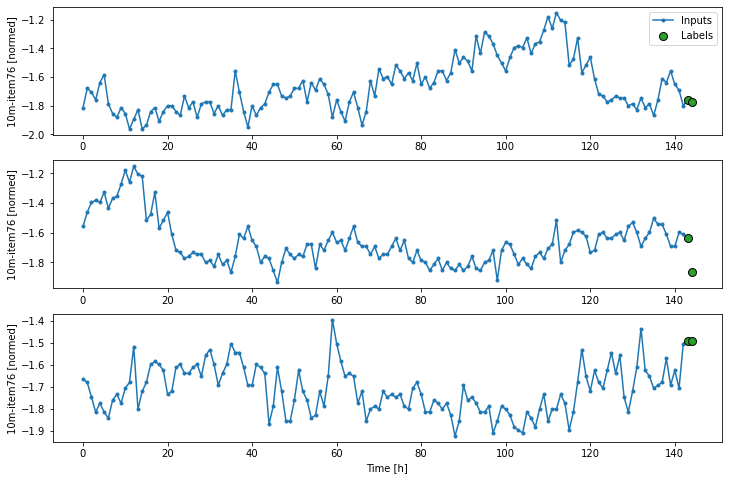

In [44]:
w2.plot()


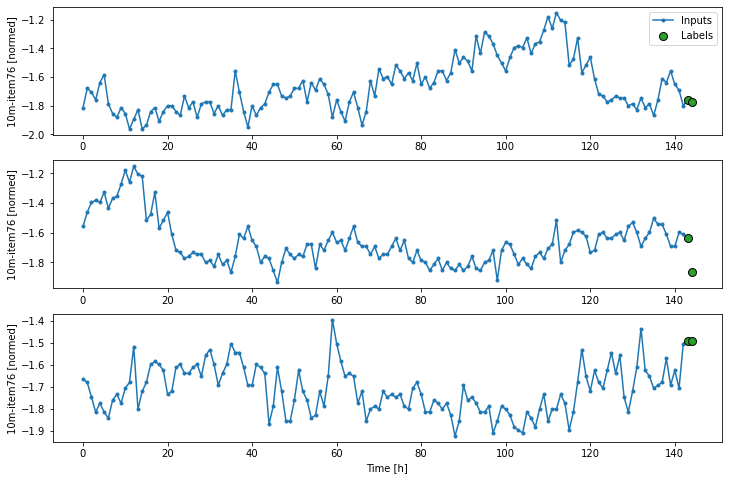

In [45]:
w2.plot(plot_col='10m-item76')


In [46]:
a = slice(2, None)
b = np.arange(10)
print(b)
print(b[a])


[0 1 2 3 4 5 6 7 8 9]
[2 3 4 5 6 7 8 9]


In [47]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=False,
      batch_size=BATCH_SIZE,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [48]:
@property
def train(self):  
  return self.make_dataset(self.train_df)

@property
def val(self):
  print(len(self.val_df))
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [49]:
# Each element is an (inputs, label) pair
w2.train.element_spec

(TensorSpec(shape=(None, 144, 15), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 2, 1), dtype=tf.float32, name=None))

In [50]:
for example_inputs, example_labels in w2.val.take(-1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

2448
Inputs shape (batch, time, features): (128, 144, 15)
Labels shape (batch, time, features): (128, 2, 1)
Inputs shape (batch, time, features): (128, 144, 15)
Labels shape (batch, time, features): (128, 2, 1)
Inputs shape (batch, time, features): (128, 144, 15)
Labels shape (batch, time, features): (128, 2, 1)
Inputs shape (batch, time, features): (128, 144, 15)
Labels shape (batch, time, features): (128, 2, 1)
Inputs shape (batch, time, features): (128, 144, 15)
Labels shape (batch, time, features): (128, 2, 1)
Inputs shape (batch, time, features): (128, 144, 15)
Labels shape (batch, time, features): (128, 2, 1)
Inputs shape (batch, time, features): (128, 144, 15)
Labels shape (batch, time, features): (128, 2, 1)
Inputs shape (batch, time, features): (128, 144, 15)
Labels shape (batch, time, features): (128, 2, 1)
Inputs shape (batch, time, features): (128, 144, 15)
Labels shape (batch, time, features): (128, 2, 1)
Inputs shape (batch, time, features): (128, 144, 15)
Labels shape (b

## Single step models

In [51]:
recreate_data(1)
print(len(val_df))

43777
2433
5377
2448


In [52]:
single_step_window = WindowGenerator(
    input_width=1, label_width=2, shift=1,
    label_columns=['10m-item76'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [0 1]
Label column name(s): ['10m-item76']

In [53]:
for example_inputs, example_labels in single_step_window.val.take(-1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

2448
Inputs shape (batch, time, features): (128, 1, 15)
Labels shape (batch, time, features): (128, 2, 1)
Inputs shape (batch, time, features): (128, 1, 15)
Labels shape (batch, time, features): (128, 2, 1)
Inputs shape (batch, time, features): (128, 1, 15)
Labels shape (batch, time, features): (128, 2, 1)
Inputs shape (batch, time, features): (128, 1, 15)
Labels shape (batch, time, features): (128, 2, 1)
Inputs shape (batch, time, features): (128, 1, 15)
Labels shape (batch, time, features): (128, 2, 1)
Inputs shape (batch, time, features): (128, 1, 15)
Labels shape (batch, time, features): (128, 2, 1)
Inputs shape (batch, time, features): (128, 1, 15)
Labels shape (batch, time, features): (128, 2, 1)
Inputs shape (batch, time, features): (128, 1, 15)
Labels shape (batch, time, features): (128, 2, 1)
Inputs shape (batch, time, features): (128, 1, 15)
Labels shape (batch, time, features): (128, 2, 1)
Inputs shape (batch, time, features): (128, 1, 15)
Labels shape (batch, time, features

### Baseline

In [54]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [55]:
baseline = Baseline(label_index=column_indices['10m-item76'])

baseline.compile(loss=lossy,
                 metrics=metrics)

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

2448
 1/20 [>.............................] - ETA: 0s - loss: 0.1907 - mae: 0.0953 - special_mae: 0.1907 - special_mae_plus: 0.2860

InvalidArgumentError:  ConcatOp : Dimensions of inputs should match: shape[0] = [128,1] vs. shape[1] = [15,1]
	 [[node concat (defined at <ipython-input-30-8ef57da45611>:10) ]] [Op:__inference_test_function_1167]

Errors may have originated from an input operation.
Input Source operations connected to node concat:
 mul_1 (defined at <ipython-input-30-8ef57da45611>:7)

Function call stack:
test_function


In [ ]:
# y_true = np.random.randint(0, 2, size=(2, 3))
# y_pred = np.random.random(size=(2, 3))
# loss = tf.keras.losses.mean_absolute_error(y_true, y_pred)
# assert loss.shape == (2,)
# assert np.array_equal(
#     loss.numpy(), np.mean(np.abs(y_true - y_pred), axis=-1))
# print(loss)

# m = tf.keras.metrics.MeanAbsoluteError()
# m.update_state(y_true, y_pred)
# print(m.result().numpy())


In [60]:
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=['10m-item76'])

wide_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['10m-item76']

In [61]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (128, 24, 15)
Output shape: (128, 24, 1)


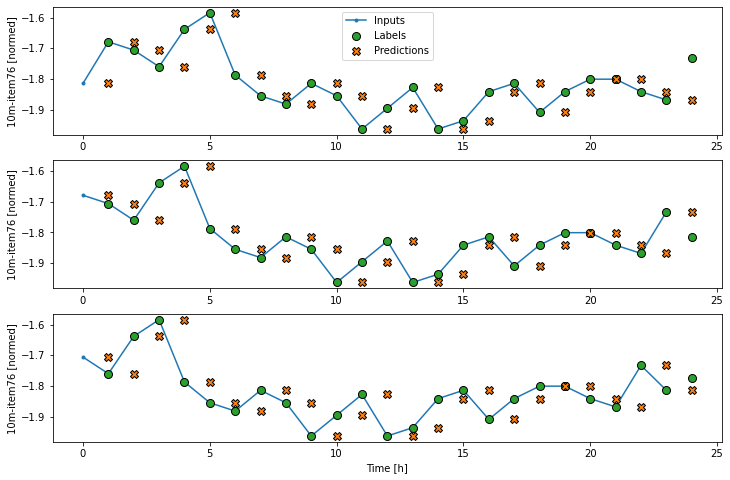

In [62]:
wide_window.plot(baseline)


### Linear model

In [63]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [64]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)

Input shape: (128, 1, 15)
Output shape: (128, 1, 1)


In [65]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=3):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

#   model.compile(loss=lossy,
#                 optimizer=tf.optimizers.Adam(),
#                 metrics=metrics)

  model.compile(loss='mse',
                optimizer=tf.optimizers.Adam(),
                metrics='mae')

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [66]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

2448
Epoch 1/20
343/343 [==============================] - 1s 3ms/step - loss: 3.6491 - mae: 1.4548 - val_loss: 3.1187 - val_mae: 1.4747
Epoch 2/20
343/343 [==============================] - 1s 3ms/step - loss: 2.4370 - mae: 1.1322 - val_loss: 1.7245 - val_mae: 1.0624
Epoch 3/20
343/343 [==============================] - 1s 3ms/step - loss: 1.8250 - mae: 0.9500 - val_loss: 1.1231 - val_mae: 0.8436
Epoch 4/20
343/343 [==============================] - 1s 3ms/step - loss: 1.4297 - mae: 0.8299 - val_loss: 0.8186 - val_mae: 0.7156
Epoch 5/20
343/343 [==============================] - 1s 3ms/step - loss: 1.1411 - mae: 0.7403 - val_loss: 0.6357 - val_mae: 0.6290
Epoch 6/20
343/343 [==============================] - 1s 3ms/step - loss: 0.9174 - mae: 0.6665 - val_loss: 0.5087 - val_mae: 0.5615
Epoch 7/20
343/343 [==============================] - 1s 3ms/step - loss: 0.7385 - mae: 0.6020 - val_loss: 0.4111 - val_mae: 0.5032
Epoch 8/20
343/343 [==============================] - 1s 3ms/step - los

In [ ]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

In [ ]:
wide_window.plot(linear)


In [ ]:
plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

In [ ]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

## Multi-step dense

In [ ]:
CONV_WIDTH = 144
train_df, val_df, test_df = recreate_data(CONV_WIDTH)

In [ ]:

conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=2,
    shift=1,
    train_df=train_df, val_df=val_df, test_df=test_df,
    label_columns=['10m-item76'])

conv_window

In [ ]:
conv_window.plot()
plt.title("Given 3h as input, predict 1h into the future.")

In [ ]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

In [ ]:
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', multi_step_dense(conv_window.example[0]).shape)

In [ ]:
for example_inputs, example_labels in conv_window.val.take(-1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

In [ ]:
history = compile_and_fit(multi_step_dense, conv_window)

IPython.display.clear_output()
val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0)

In [ ]:
conv_window.plot(multi_step_dense)


In [ ]:
print('Input shape:', wide_window.example[0].shape)
try:
  print('Output shape:', multi_step_dense(wide_window.example[0]).shape)
except Exception as e:
  print(f'\n{type(e).__name__}:{e}')

## Convolution neural network

In [ ]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

In [ ]:
print("Conv model on `conv_window`")
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', conv_model(conv_window.example[0]).shape)



In [ ]:
history = compile_and_fit(conv_model, conv_window)

IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

In [ ]:
# po starom

In [ ]:
print("Wide window")
print('Input shape:', wide_wiconv_windowndow.example[0].shape)
print('Labels shape:', wide_window.example[1].shape)
print('Output shape:', conv_model(wide_window.example[0]).shape)

In [ ]:
LABEL_WIDTH = 24
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['10m-item76'])

wide_conv_window

In [ ]:
print("Wide conv window")
print('Input shape:', wide_conv_window.example[0].shape)
print('Labels shape:', wide_conv_window.example[1].shape)
print('Output shape:', conv_model(wide_conv_window.example[0]).shape)

In [ ]:
wide_conv_window.plot(conv_model)


In [88]:
wide_window = WindowGenerator(
    input_width=144*7, label_width=144*7, shift=1,
    label_columns=['10m-item76'])

wide_window

Total window size: 1009
Input indices: [   0    1    2 ... 1005 1006 1007]
Label indices: [   1    2    3 ... 1006 1007 1008]
Label column name(s): ['10m-item76']

## Recurrent neural network

In [89]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
#     tf.keras.layers.LSTM(144, return_sequences=True),
    tf.keras.layers.LSTM(144, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [90]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (128, 1008, 15)
Output shape: (128, 1008, 1)


In [91]:
history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

2448
12/12 [==============================] - 0s 29ms/step - loss: 0.0421 - mae: 0.1192


In [ ]:
# 2 vrstvy
history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

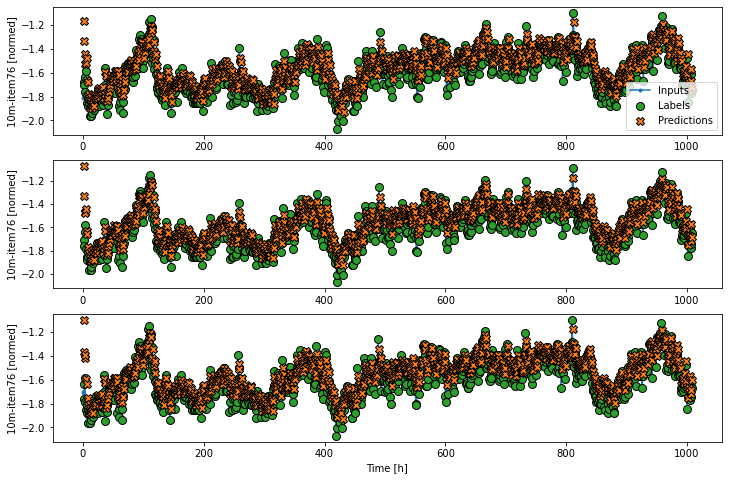

In [92]:
wide_window.plot(lstm_model)

In [175]:
aaa  = lstm_model.predict(wide_window.test)


In [176]:
aaa.shape

(4384, 1008, 1)

In [177]:
aaa = aaa.reshape((4384, 1008))

In [118]:
bbb = aaa[:,-1]
bbb.shape

(4384,)

In [119]:
real[-4384:].shape

(4384,)

In [155]:
print(aaa.shape)
print(test_df.shape)

(4384, 1008)
(5392, 15)


In [172]:
wide_window.test.take(0)

<TakeDataset shapes: ((None, 1008, 15), (None, 1008, 1)), types: (tf.float32, tf.float32)>

In [158]:
predikovane = []
skutocnost = []
for x, y in wide_window.test.take(-1):
    predikovane.append(lstm_model.predict(x))
    skutocnost.append(y)
predikovane = np.array(predikovane)
skutocnost = np.array(skutocnost)

/home/richard_stana/.conda/envs/pipTF2.3-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/home/richard_stana/.conda/envs/pipTF2.3-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



In [163]:
skutocnost.shape

(35,)

In [165]:
skutocnostPosunuta = skutocnost1[:,0]
skutocnost1 = skutocnost1[:,1]
skutocnost1.shape

(4384, 1)

In [166]:
skutocnost1 = skutocnost1.reshape(4384)
skutocnost1.shape

(4384,)

In [164]:
predikovane1 = predikovane[0]
skutocnost1 = skutocnost[0]
for i in range(1,len(predikovane)):
    predikovane1 = np.concatenate((predikovane1, predikovane[i]), axis=0)
    skutocnost1 = np.concatenate((skutocnost1, skutocnost[i]), axis=0)


In [104]:
real = np.array(test_df['10m-item76'])

In [124]:
test_df['10m-item76'].shape

(5392,)

In [111]:
real.shape

(5392,)

In [123]:
aaa.shape

(4384, 1008)

In [174]:
ccc = []
ddd = []
for x, y in wide_window.test.take(-1):
    ccc=x
    ddd=y
    break
print(ccc.shape)
print(ddd.shape)
    

(128, 1008, 15)
(128, 1008, 1)


In [180]:
ccc[0].shape

TensorShape([1008, 15])

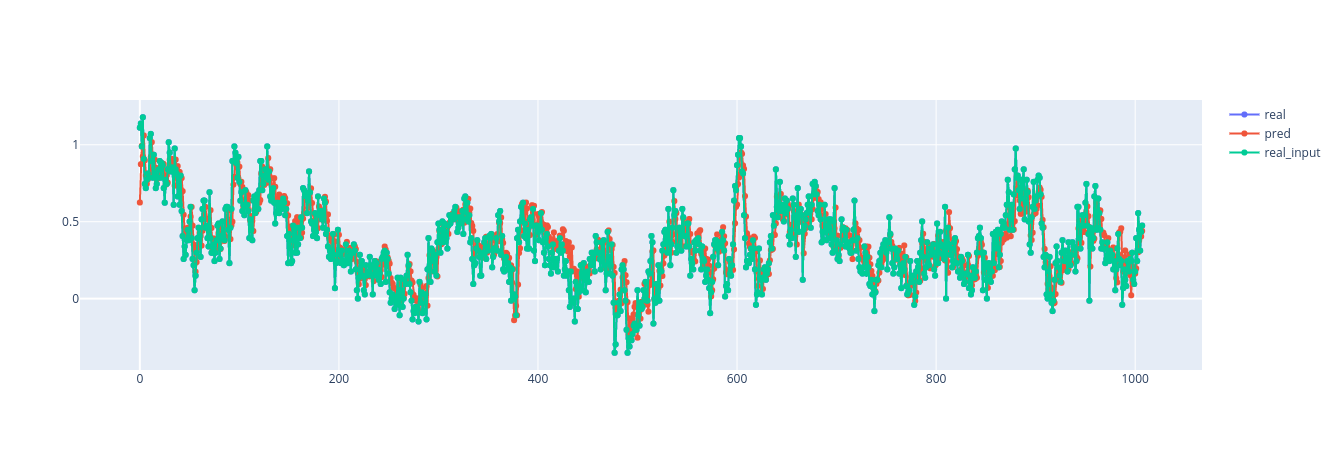

In [187]:
import plotly.graph_objects as go

# Create random data with numpy
import numpy as np

random_x =np.arange(1008)

# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=random_x, y=real[1:1009],
                    mode='lines+markers',
                    name='real'))
fig.add_trace(go.Scatter(x=random_x, y=aaa[0],
                    mode='lines+markers',
                    name='pred'))
fig.add_trace(go.Scatter(x=random_x, y=np.array(ddd[0]).reshape((1008)),
                    mode='lines+markers',
                    name='real_input'))

fig.show()

In [126]:
print(real[-4385:].shape)
print(bbb.shape)

(4385,)
(4384,)


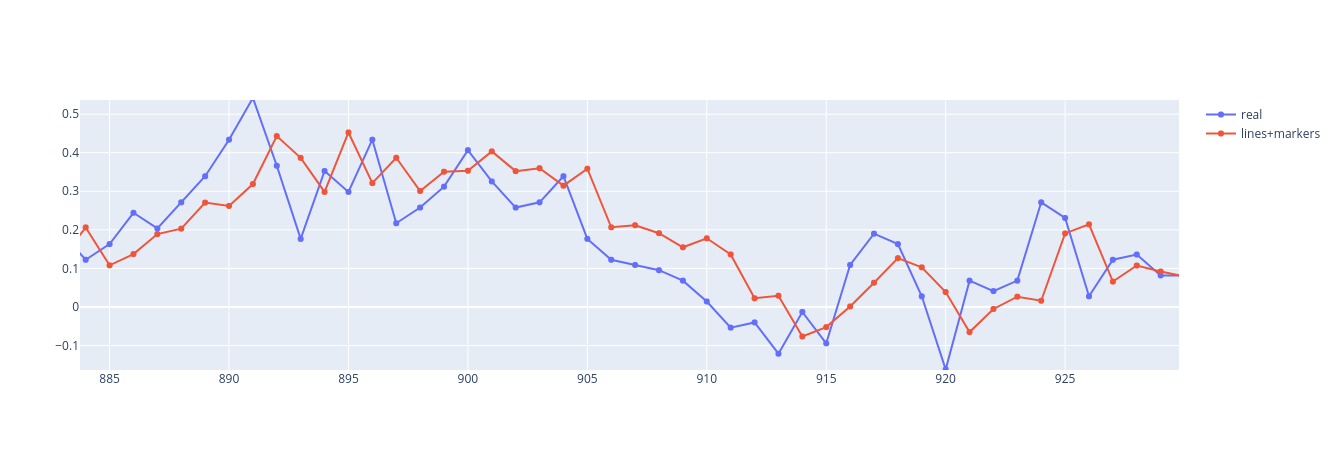

In [156]:
import plotly.graph_objects as go

# Create random data with numpy
import numpy as np

random_x =np.arange(1008)

# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=random_x, y=real[-4384:],
                    mode='lines+markers',
                    name='real'))
fig.add_trace(go.Scatter(x=random_x, y=bbb,
                    mode='lines+markers',
                    name='lines+markers'))


fig.show()

## Performance

In [188]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [T (degC), normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

ValueError: 'mean_absolute_error' is not in list

In [189]:
for name, value in performance.items():
  print(f'{name:12s}: {value[1]:0.4f}')

Linear      : 0.2097
LSTM        : 0.2692


## Multi-output models

In [190]:
single_step_window = WindowGenerator(
    # `WindowGenerator` returns all features as labels if you 
    # don't set the `label_columns` argument.
    input_width=1, label_width=1, shift=1)

wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1)

for example_inputs, example_labels in wide_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (128, 24, 15)
Labels shape (batch, time, features): (128, 24, 15)


### Baseline

In [191]:
baseline = Baseline()
baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

In [192]:
val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(wide_window.val)
performance['Baseline'] = baseline.evaluate(wide_window.test, verbose=0)

2448
19/19 [==============================] - 0s 3ms/step - loss: 0.4897 - mean_absolute_error: 0.2813


### Dense

In [193]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=num_features)
])

In [194]:
history = compile_and_fit(dense, single_step_window)

IPython.display.clear_output()
val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

2448
20/20 [==============================] - 0s 3ms/step - loss: 0.4017 - mae: 0.3252


### RNN

In [195]:
%%time
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1)

lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=num_features)
])

history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate( wide_window.val)
performance['LSTM'] = lstm_model.evaluate( wide_window.test, verbose=0)

print()

2448
19/19 [==============================] - 0s 3ms/step - loss: 0.3415 - mae: 0.2829

CPU times: user 3min 35s, sys: 32 s, total: 4min 7s
Wall time: 50.3 s


### Advanced: Residual connections

In [196]:
class ResidualWrapper(tf.keras.Model):
  def __init__(self, model):
    super().__init__()
    self.model = model

  def call(self, inputs, *args, **kwargs):
    delta = self.model(inputs, *args, **kwargs)

    # The prediction for each timestep is the input
    # from the previous time step plus the delta
    # calculated by the model.
    return inputs + delta

In [197]:
%%time
residual_lstm = ResidualWrapper(
    tf.keras.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dense(
        num_features,
        # The predicted deltas should start small
        # So initialize the output layer with zeros
        kernel_initializer=tf.initializers.zeros)
]))

history = compile_and_fit(residual_lstm, wide_window)

IPython.display.clear_output()
val_performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.val)
performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.test, verbose=0)
print()

2448
19/19 [==============================] - 0s 4ms/step - loss: 0.3887 - mae: 0.2778

CPU times: user 3min 36s, sys: 31.4 s, total: 4min 7s
Wall time: 50.2 s


### Performance

In [198]:
x = np.arange(len(performance))
width = 0.3

metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
plt.ylabel('MAE (average over all outputs)')
_ = plt.legend()

ValueError: 'mean_absolute_error' is not in list

In [199]:
for name, value in performance.items():
  print(f'{name:15s}: {value[1]:0.4f}')

Baseline       : 0.3836
Dense          : 0.6593
LSTM           : 0.9344
Residual LSTM  : 0.4455


## Multi-step models

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Label column name(s): None

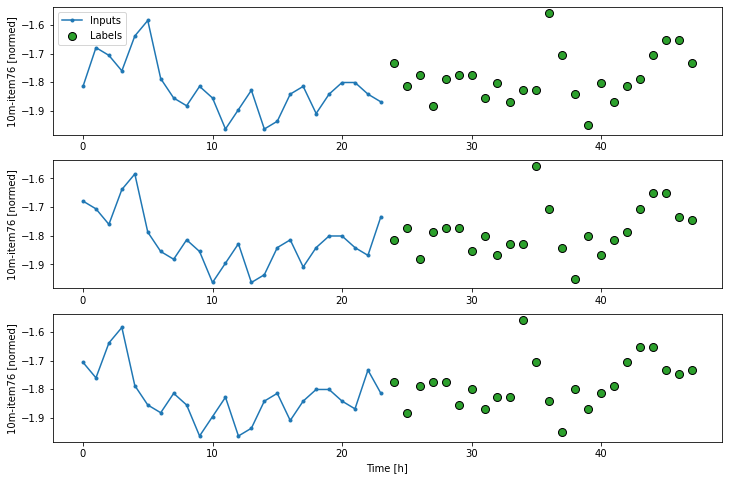

In [200]:
OUT_STEPS = 24
multi_window = WindowGenerator(input_width=24,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)

multi_window.plot()
multi_window

## Baselines

2448
19/19 [==============================] - 0s 3ms/step - loss: 0.8739 - mean_absolute_error: 0.4222


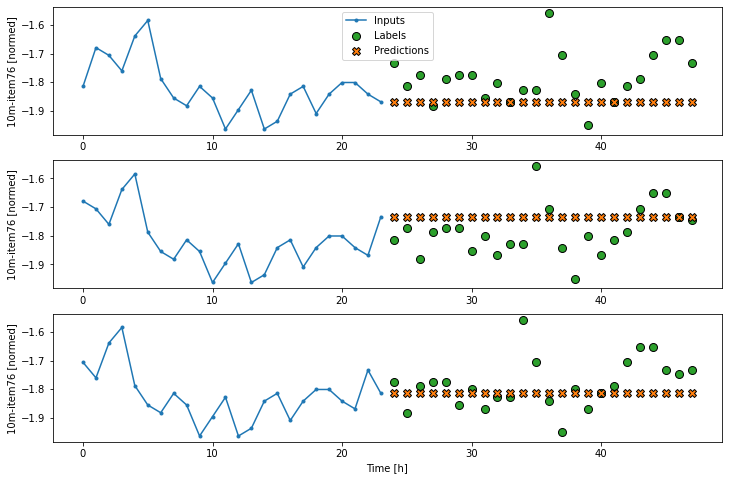

In [201]:
class MultiStepLastBaseline(tf.keras.Model):
  def call(self, inputs):
    return tf.tile(inputs[:, -1:, :], [1, OUT_STEPS, 1])

last_baseline = MultiStepLastBaseline()
last_baseline.compile(loss=tf.losses.MeanSquaredError(),
                      metrics=[tf.metrics.MeanAbsoluteError()])

multi_val_performance = {}
multi_performance = {}

multi_val_performance['Last'] = last_baseline.evaluate(multi_window.val)
multi_performance['Last'] = last_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(last_baseline)

2448
19/19 [==============================] - 0s 4ms/step - loss: 1.0298 - mean_absolute_error: 0.5004


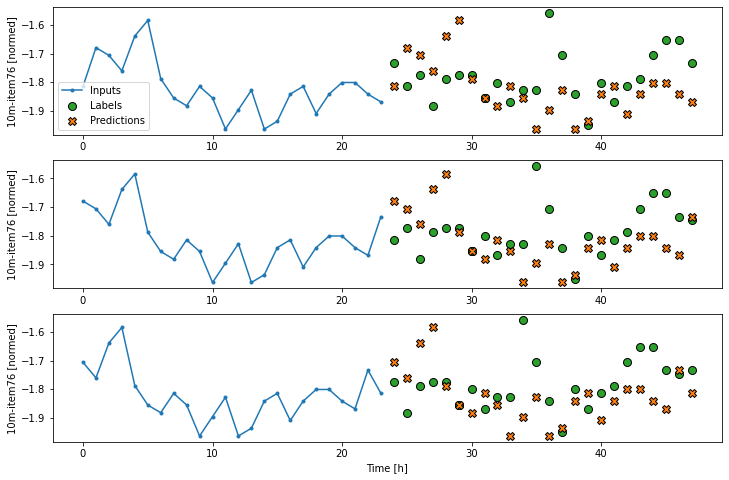

In [202]:
class RepeatBaseline(tf.keras.Model):
  def call(self, inputs):
    return inputs

repeat_baseline = RepeatBaseline()
repeat_baseline.compile(loss=tf.losses.MeanSquaredError(),
                        metrics=[tf.metrics.MeanAbsoluteError()])

multi_val_performance['Repeat'] = repeat_baseline.evaluate(multi_window.val)
multi_performance['Repeat'] = repeat_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(repeat_baseline)

### Single-shot models

2448
19/19 [==============================] - 0s 3ms/step - loss: 0.6287 - mae: 0.4233


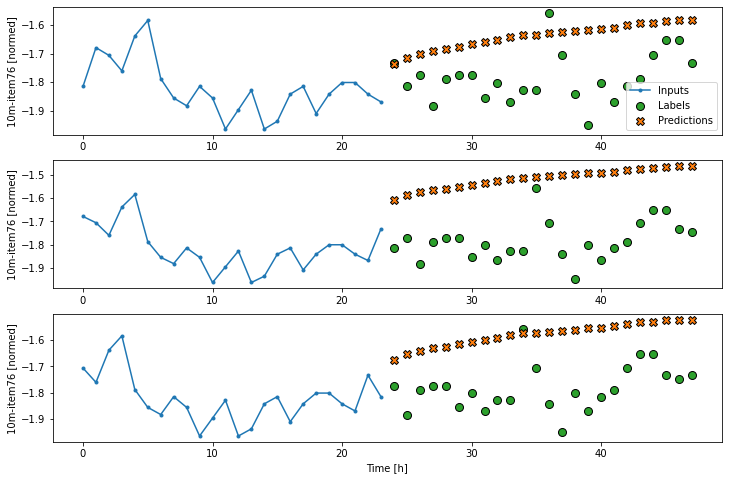

In [203]:
multi_linear_model = tf.keras.Sequential([
    # Take the last time-step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_linear_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Linear'] = multi_linear_model.evaluate(multi_window.val)
multi_performance['Linear'] = multi_linear_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_linear_model)

### Dense

2448
19/19 [==============================] - 0s 3ms/step - loss: 0.5849 - mae: 0.4160


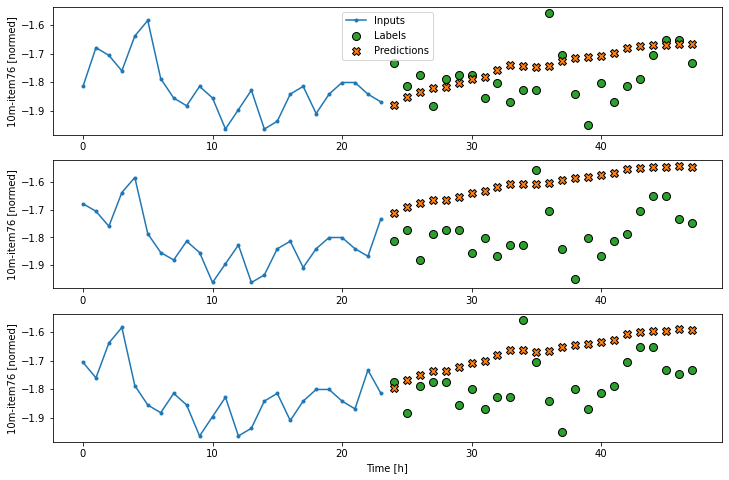

In [204]:
multi_dense_model = tf.keras.Sequential([
    # Take the last time step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, dense_units]
    tf.keras.layers.Dense(512, activation='relu'),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_dense_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Dense'] = multi_dense_model.evaluate(multi_window.val)
multi_performance['Dense'] = multi_dense_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_dense_model)

### CNN

2448
19/19 [==============================] - 0s 3ms/step - loss: 0.5671 - mae: 0.4048


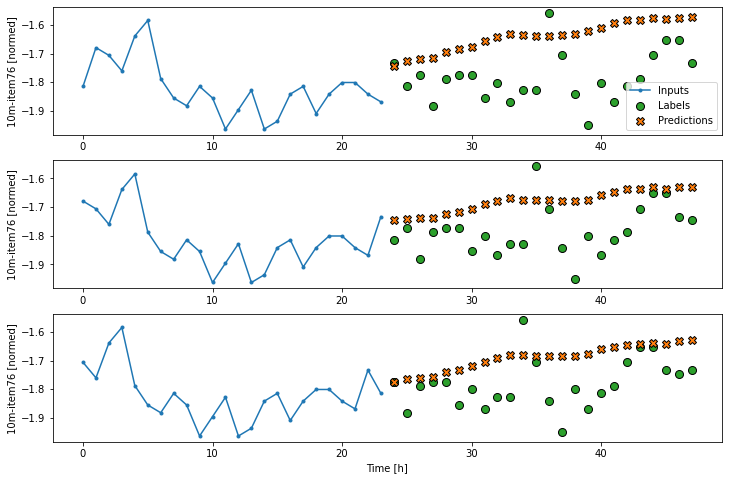

In [205]:
CONV_WIDTH = 3
multi_conv_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),
    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_conv_model, multi_window)

IPython.display.clear_output()

multi_val_performance['Conv'] = multi_conv_model.evaluate(multi_window.val)
multi_performance['Conv'] = multi_conv_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_conv_model)

### RNN

2448
19/19 [==============================] - 0s 3ms/step - loss: 0.5561 - mae: 0.3997


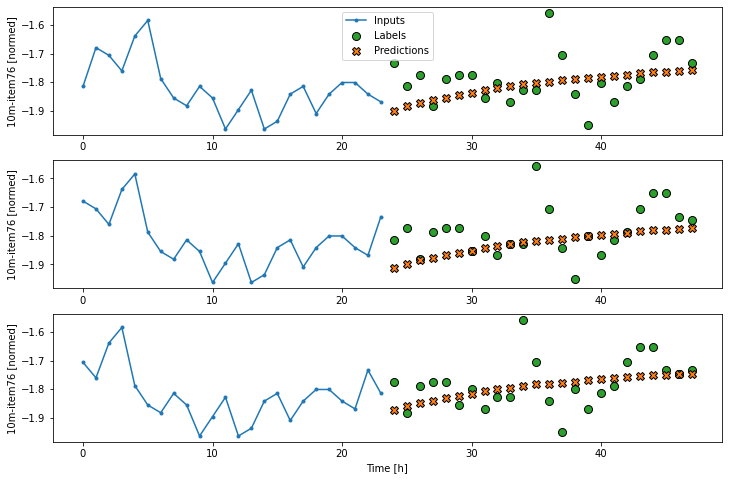

In [206]:
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units]
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)

IPython.display.clear_output()

multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_lstm_model)

## Advanced: Autoregressive model

### RNN

In [207]:
class FeedBack(tf.keras.Model):
  def __init__(self, units, out_steps):
    super().__init__()
    self.out_steps = out_steps
    self.units = units
    self.lstm_cell = tf.keras.layers.LSTMCell(units)
    # Also wrap the LSTMCell in an RNN to simplify the `warmup` method.
    self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
    self.dense = tf.keras.layers.Dense(num_features)

In [208]:
feedback_model = FeedBack(units=32, out_steps=OUT_STEPS)


In [209]:
def warmup(self, inputs):
  # inputs.shape => (batch, time, features)
  # x.shape => (batch, lstm_units)
  x, *state = self.lstm_rnn(inputs)

  # predictions.shape => (batch, features)
  prediction = self.dense(x)
  return prediction, state

FeedBack.warmup = warmup

In [210]:
prediction, state = feedback_model.warmup(multi_window.example[0])
prediction.shape

TensorShape([128, 15])

In [211]:
def call(self, inputs, training=None):
  # Use a TensorArray to capture dynamically unrolled outputs.
  predictions = []
  # Initialize the lstm state
  prediction, state = self.warmup(inputs)

  # Insert the first prediction
  predictions.append(prediction)

  # Run the rest of the prediction steps
  for n in range(1, self.out_steps):
    # Use the last prediction as input.
    x = prediction
    # Execute one lstm step.
    x, state = self.lstm_cell(x, states=state,
                              training=training)
    # Convert the lstm output to a prediction.
    prediction = self.dense(x)
    # Add the prediction to the output
    predictions.append(prediction)

  # predictions.shape => (time, batch, features)
  predictions = tf.stack(predictions)
  # predictions.shape => (batch, time, features)
  predictions = tf.transpose(predictions, [1, 0, 2])
  return predictions

FeedBack.call = call

In [212]:
print('Output shape (batch, time, features): ', feedback_model(multi_window.example[0]).shape)


Output shape (batch, time, features):  (128, 24, 15)


2448
19/19 [==============================] - 0s 11ms/step - loss: 0.6872 - mae: 0.5004


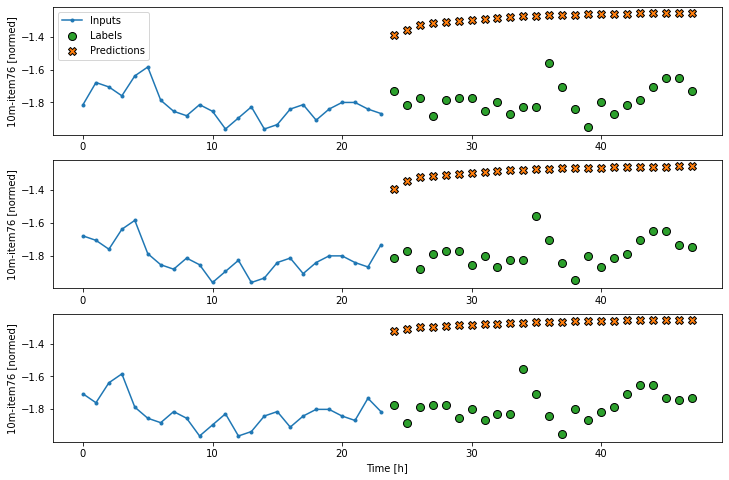

In [213]:
history = compile_and_fit(feedback_model, multi_window)

IPython.display.clear_output()

multi_val_performance['AR LSTM'] = feedback_model.evaluate(multi_window.val)
multi_performance['AR LSTM'] = feedback_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(feedback_model)

### Performance

In [214]:
x = np.arange(len(multi_performance))
width = 0.3


metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in multi_val_performance.values()]
test_mae = [v[metric_index] for v in multi_performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=multi_performance.keys(),
           rotation=45)
plt.ylabel(f'MAE (average over all times and outputs)')
_ = plt.legend()

ValueError: 'mean_absolute_error' is not in list